<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/Tasa_de_llegada_y_salida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size

# Lectura de la base de datos
filename = 'Tasas de llegada y salida UFV.xlsx'
data = pd.read_excel(filename)

# Revisión de los datos
print(data.shape)
data.head(10)

(80, 6)


,Fecha,Día,Turno de mañana entrada,Turno de mañana salida,Turno de tarde entrada,Turno de tarde salida
0,2022-09-12,L,NaN,NaN,NaN,NaN
1,2022-09-13,M,NaN,NaN,NaN,NaN
2,2022-09-14,X,898.0,1431.0,1043.0,1200.0
3,2022-09-15,J,3557.0,2955.0,3062.0,5296.0
4,2022-09-16,V,2205.0,1803.0,2426.0,4122.0
5,2022-09-17,NaN,NaN,NaN,NaN,NaN
6,2022-09-18,NaN,NaN,NaN,NaN,NaN
7,2022-09-19,L,3809.0,2714.0,2451.0,4483.0
8,2022-09-20,M,3845.0,3177.0,3147.0,5332.0
9,2022-09-21,X,3870.0,3147.0,2802.0,3964.0


Calculo de la tasa de llegada y de salida de cada día los coches en la UFV tanto por la mañana como por la tarde

In [99]:
data = data.dropna()
data.head(10)

,Fecha,Día,Turno de mañana entrada,Turno de mañana salida,Turno de tarde entrada,Turno de tarde salida
2,2022-09-14,X,898.0,1431.0,1043.0,1200.0
3,2022-09-15,J,3557.0,2955.0,3062.0,5296.0
4,2022-09-16,V,2205.0,1803.0,2426.0,4122.0
7,2022-09-19,L,3809.0,2714.0,2451.0,4483.0
8,2022-09-20,M,3845.0,3177.0,3147.0,5332.0
9,2022-09-21,X,3870.0,3147.0,2802.0,3964.0
10,2022-09-22,J,3934.0,2084.0,2595.0,2769.0
11,2022-09-23,V,1592.0,1546.0,1969.0,2056.0
14,2022-09-26,L,3814.0,2116.0,3115.0,4772.0
15,2022-09-27,M,3914.0,1995.0,3325.0,4666.0


In [100]:
# Creamos una nueva columna con los meses
data['mes'] = data.apply(lambda _: '', axis=1)

# Pasamos la columna fecha a tipo string
data = data.astype({'Fecha': 'str'})

# Guardamos en la nueva columna lo que nos interesa de la fecha, que es el mes
data['mes'] = data['Fecha'].str[5:7]

data.head(10)

<ipython-input-100-db02e817147f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mes'] = data.apply(lambda _: '', axis=1)


,Fecha,Día,Turno de mañana entrada,Turno de mañana salida,Turno de tarde entrada,Turno de tarde salida,mes
2,2022-09-14,X,898.0,1431.0,1043.0,1200.0,09
3,2022-09-15,J,3557.0,2955.0,3062.0,5296.0,09
4,2022-09-16,V,2205.0,1803.0,2426.0,4122.0,09
7,2022-09-19,L,3809.0,2714.0,2451.0,4483.0,09
8,2022-09-20,M,3845.0,3177.0,3147.0,5332.0,09
9,2022-09-21,X,3870.0,3147.0,2802.0,3964.0,09
10,2022-09-22,J,3934.0,2084.0,2595.0,2769.0,09
11,2022-09-23,V,1592.0,1546.0,1969.0,2056.0,09
14,2022-09-26,L,3814.0,2116.0,3115.0,4772.0,09
15,2022-09-27,M,3914.0,1995.0,3325.0,4666.0,09


In [101]:
conditions = [(data['Día'] == 'L'),
              (data['Día'] == 'M'),
              (data['Día'] == 'X'),
              (data['Día'] == 'J'),
              (data['Día'] == 'V')]

results = [1,2,3,4,5]

data['Día'] = np.select(conditions, results)

In [102]:
# Queremos saber tanto la tasa de llegada como de salida de todos los días de la
# semana por cada mes
df_m_d = data.groupby(['mes','Día']).mean().reset_index()
df_m_d['Turno de mañana entrada'] = df_m_d['Turno de mañana entrada']/5 # Tasa de llegada en el turno de mañana
df_m_d['Turno de tarde entrada'] = df_m_d['Turno de tarde entrada']/8 # Tasa de llegada en el turno de tarde
df_m_d['Turno de mañana salida'] = df_m_d['Turno de mañana salida']/5 # Tasa de salida en el turno de mañana
df_m_d['Turno de tarde salida'] = df_m_d['Turno de tarde salida']/8 # Tasa de salida en el turno de tarde

print(df_m_d)

# Tasa de llegada y salida de todos los días de la semana independientemente del mes
df_d = data.groupby('Día').mean().reset_index()
df_d['Turno de mañana entrada'] = df_d['Turno de mañana entrada']/5 # Tasa de llegada en el turno de mañana
df_d['Turno de tarde entrada'] = df_d['Turno de tarde entrada']/8 # Tasa de llegada en el turno de tarde
df_d['Turno de mañana salida'] = df_d['Turno de mañana salida']/5 # Tasa de salida en el turno de mañana
df_d['Turno de tarde salida'] = df_d['Turno de tarde salida']/8 # Tasa de salida en el turno de 

print(df_d)

   mes  Día  Turno de mañana entrada  Turno de mañana salida  \
0   01    1               808.600000              447.800000   
1   01    2               798.200000              453.400000   
2   02    1               783.400000              451.600000   
3   02    2               823.000000              455.400000   
4   02    3               790.800000              509.500000   
5   02    4               786.400000              465.900000   
6   02    5               712.300000              487.100000   
7   09    1               762.300000              483.000000   
8   09    2               775.900000              517.200000   
9   09    3               583.933333              466.133333   
10  09    4               764.533333              475.600000   
11  09    5               490.333333              369.466667   
12  10    1               760.840000              275.200000   
13  10    2               817.333333              303.333333   
14  10    3               418.533333    

### Gráfica de los nªcoches/hora en función de los días

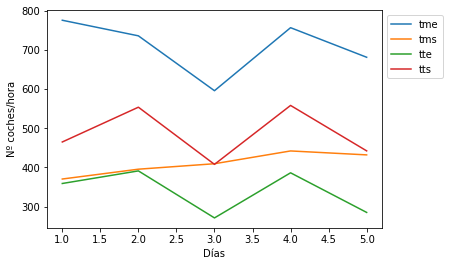

In [103]:
import matplotlib.pyplot as plt

# Vector días
dias = df_d["Día"]

# Turno de mañana entrada
tme = df_d["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_d["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_d["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_d["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()

### Gráfica de los nªcoches/hora en función de los meses y los días

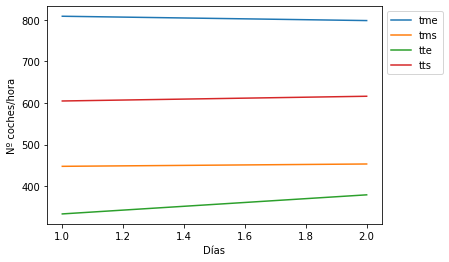

In [104]:
# Enero
import matplotlib.pyplot as plt

df_Enero = df_m_d[df_m_d['mes'].apply(lambda x: '01' in x)]

# Vector días
dias = df_Enero["Día"]

# Turno de mañana entrada
tme = df_Enero["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_Enero["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_Enero["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_Enero["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()

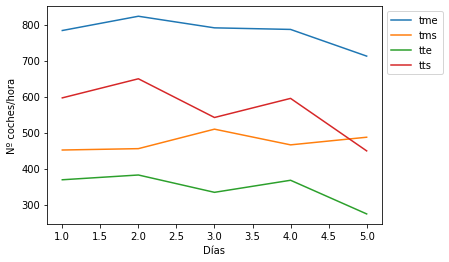

In [105]:
# Febrero
import matplotlib.pyplot as plt

df_Feb = df_m_d[df_m_d['mes'].apply(lambda x: '02' in x)]

# Vector días
dias = df_Feb["Día"]

# Turno de mañana entrada
tme = df_Feb["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_Feb["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_Feb["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_Feb["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()

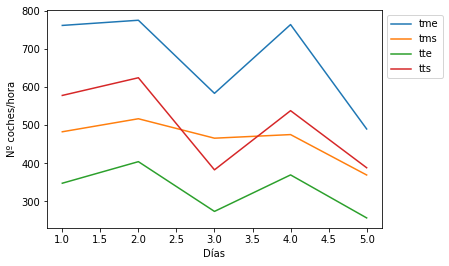

In [107]:
# Septiembre
import matplotlib.pyplot as plt

df_Sep = df_m_d[df_m_d['mes'].apply(lambda x: '09' in x)]

# Vector días
dias = df_Sep["Día"]

# Turno de mañana entrada
tme = df_Sep["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_Sep["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_Sep["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_Sep["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()

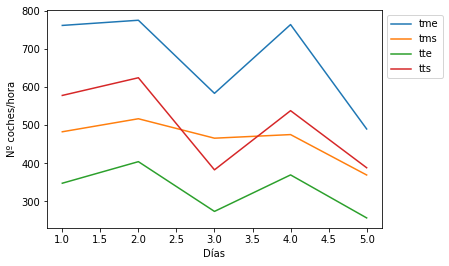

In [108]:
# Octubre
import matplotlib.pyplot as plt

df_Oct = df_m_d[df_m_d['mes'].apply(lambda x: '09' in x)]

# Vector días
dias = df_Oct["Día"]

# Turno de mañana entrada
tme = df_Oct["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_Oct["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_Oct["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_Oct["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()

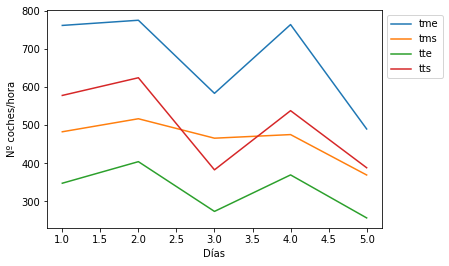

In [109]:
# Noviembre
import matplotlib.pyplot as plt

df_Nov = df_m_d[df_m_d['mes'].apply(lambda x: '09' in x)]

# Vector días
dias = df_Nov["Día"]

# Turno de mañana entrada
tme = df_Nov["Turno de mañana entrada"]

# Turno de mañana entrada
tms = df_Nov["Turno de mañana salida"]

# Turno de mañana entrada
tte = df_Nov["Turno de tarde entrada"]

# Turno de mañana entrada
tts = df_Nov["Turno de tarde salida"]

# Gráfica
fig, ax = plt.subplots()
ax.plot(dias,tme)
plt.xlabel("Días")
plt.ylabel("Nº coches/hora")
plt.plot(dias,tms)
plt.plot(dias,tte)
plt.plot(dias,tts)
plt.legend(['tme','tms','tte','tts'], bbox_to_anchor=(1,1))
plt.show()